In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import os 
import warnings as warnings 
import keras

### ANS 1

In [2]:
print(tf.__version__)

2.15.0


In [3]:
print(keras.__version__)

2.15.0


In [4]:
df=pd.read_csv('Wine.csv')

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


# ANS 2

In [6]:
print(df.shape)
print(f'no of rows={df.shape[0]}')
print(f'no of columns={df.shape[1]}')

(1599, 12)
no of rows=1599
no of columns=12


In [7]:
os.getcwd()

'C:\\Users\\amand'

In [9]:
os.makedirs('C:\python revision\deep1')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\python revision\\deep1'

In [7]:
 os.chdir('C:\python revision\deep1')

In [42]:
os.getcwd()

'C:\\python revision\\deep1'

# ANS 3

In [12]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
categorical_list=[]
for column_name, dtype in df.dtypes.items():
    if dtype=='object':
        categorical_list.append(column_name)
        

In [10]:
categorical_list

['quality']

In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [12]:
encoder=LabelEncoder()

In [16]:
df['quality']=encoder.fit_transform(df[['quality']])

C:\Users\amand\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ANS 4

In [24]:
X=df.drop('quality',axis=1)
y=df[['quality']]

# ANS 5

In [25]:
X.shape

(1599, 11)

In [26]:
y.shape

(1599, 1)

In [27]:
X_train_full,X_test,y_train_full,y_test=train_test_split(X,y,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=42)

In [28]:
X_train.shape

(899, 11)

# ANS 6

In [29]:
scaler=StandardScaler()

In [30]:
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

# ANS 7

In [49]:
LAYERS= [
    tf.keras.layers.Dense(40,activation='relu',input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')]


# ANS 8

In [50]:
model=tf.keras.models.Sequential(LAYERS)

# ANS 9

In [43]:
import time 

def get_log_path(log_dir='logs/fit'):
    fileName=time.strftime('log_%Y_%m_%d_%H_%M_%S')
    logs_path=os.path.join(log_dir,fileName)
    print(f'saving logs at {logs_path}')
    return logs_path

log_dir=get_log_path()
tb_cb=tf.keras.callbacks.TensorBoard(log_dir=log_dir)

saving logs at logs/fit\log_2024_01_31_21_51_11


# ANS 10

In [44]:
early_stopping_cb=tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# ANS 11

In [45]:
ckpt_path='model_ckpt.h5'
checkpointing_cb=tf.keras.callbacks.ModelCheckpoint(ckpt_path,save_best_only=True)

In [46]:
Callbacks=[checkpointing_cb,early_stopping_cb,checkpointing_cb]

# ANS 12

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                480       
                                                                 
 dense_1 (Dense)             (None, 20)                820       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 2)                 22        
                                                                 
Total params: 1532 (5.98 KB)
Trainable params: 1532 (5.98 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# ANS 13

In [48]:
Loss_function='binary_crossentropy'
Optimizer='adam'
Metrices='accuracy'

# ANS 14

In [51]:
model.compile(optimizer=Optimizer,loss=Loss_function,metrics=Metrices)

# ANS 15

In [56]:
EPOCHS=30
Validation_set=(X_valid, y_valid)
history=model.fit(X_train, y_train, epochs=EPOCHS, validation_data=Validation_set,batch_size=32,callbacks=Callbacks)

Epoch 1/30
29/29 [==============================] - 0s 8ms/step - loss: 0.4664 - accuracy: 0.7720 - val_loss: 0.5779 - val_accuracy: 0.7300
Epoch 2/30
29/29 [==============================] - 0s 5ms/step - loss: 0.4609 - accuracy: 0.7731 - val_loss: 0.5792 - val_accuracy: 0.7200
Epoch 3/30
29/29 [==============================] - 0s 5ms/step - loss: 0.4573 - accuracy: 0.7753 - val_loss: 0.5789 - val_accuracy: 0.7233
Epoch 4/30
29/29 [==============================] - 0s 5ms/step - loss: 0.4547 - accuracy: 0.7764 - val_loss: 0.5796 - val_accuracy: 0.7267
Epoch 5/30
29/29 [==============================] - 0s 5ms/step - loss: 0.4516 - accuracy: 0.7731 - val_loss: 0.5778 - val_accuracy: 0.7400
Epoch 6/30
29/29 [==============================] - 0s 5ms/step - loss: 0.4482 - accuracy: 0.7809 - val_loss: 0.5841 - val_accuracy: 0.7400
Epoch 7/30
29/29 [==============================] - 0s 5ms/step - loss: 0.4473 - accuracy: 0.7809 - val_loss: 0.5872 - val_accuracy: 0.7433
Epoch 8/30
29/29 [==

# ANS 16

In [57]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 29}

# ANS 17

In [58]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.466425,0.771969,0.577935,0.730000
1,0.460851,0.773081,0.579226,0.720000
2,0.457273,0.775306,0.578869,0.723333
3,0.454732,0.776418,0.579554,0.726667
4,0.451632,0.773081,0.577769,0.740000
5,0.448204,0.780868,0.584150,0.740000
6,0.447263,0.780868,0.587235,0.743333
7,0.444112,0.780868,0.586967,0.740000
8,0.438028,0.784205,0.590060,0.746667
9,0.434903,0.783092,0.589229,0.746667


# ANS 18

<Axes: >

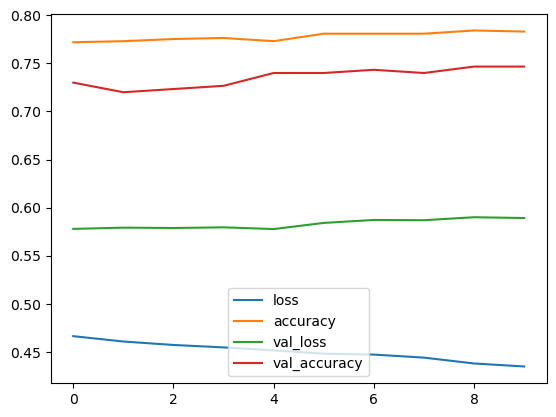

In [59]:
pd.DataFrame(history.history).plot()

# ANS 19

In [60]:
model.evaluate(X_test,y_test)

13/13 [==============================] - 0s 2ms/step - loss: 0.5180 - accuracy: 0.7200


[0.5180240273475647, 0.7200000286102295]